In [11]:
import matplotlib.pyplot as plt
from matplotlib import colors
import random

In [12]:
#creating data 
def generate_data(rows,cols):
    return [[random.randint(0, 1) for _ in range(cols)] for _ in range(rows)]

matrix = [
  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
  [0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,1],
  [0,1,0,0,0,1,1,0,1,1,0,1,1,1,0,0,1,1,1,1],
  [0,0,1,0,0,0,0,0,1,1,1,1,0,0,1,0,1,1,1,1],
  [0,0,1,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,1],
  [0,1,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1],
  [0,0,1,1,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1],
  [0,0,1,1,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0],
  [0,1,0,1,0,1,0,0,0,1,1,0,1,1,1,0,0,1,0,1],
  [0,1,1,0,1,1,0,1,1,1,1,1,1,1,0,0,0,0,1,0],  
  [0,1,0,0,1,1,0,1,0,1,1,1,1,0,0,1,1,0,1,1],
  [0,0,0,1,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1],
  [0,0,0,0,1,0,1,1,1,1,0,1,0,0,0,1,1,1,1,1],
  [0,1,1,1,0,1,1,1,1,0,1,0,0,0,1,0,0,0,0,0],
  [0,0,0,1,0,1,1,0,1,0,0,0,1,1,0,1,0,1,1,0],  
  [0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1],
  [0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1],
  [0,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,0,0,1,1],
  [0,0,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1],
  [0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1],
]

In [ ]:
#works for matrixes with different number of rows and cols
#considers that left and right/top and bottom edges are stitched, so there are all neighbours to cells on the border
def lifeCycle(matrix):
    if not all(len(row) == len(matrix[0]) for row in matrix):
        raise ValueError("All rows in the matrix must have the same length.")
    
    rows = len(matrix)
    cols = len(matrix[0])
    
    #making empty array to store result of iteration
    interim_matrix = [[0 for _ in range(cols)] for _ in range(rows)]

    #directions for neighbours
    directions = [
        [-1, -1],
        [-1, 0],
        [-1, 1],
        [0, -1],
        [0, 1],
        [1, -1],
        [1, 0],
        [1, 1],
    ]

    for i in range(rows):
        for j in range(cols):
            neighbors_amount = 0

            #checking the amount of alive neighbours
            #division with remainder allows to simulate stitching left to right, top to bottom
            for dx, dy in directions:
                x = (i + dx + rows) % rows
                y = (j + dy + cols) % cols

                if matrix[x][y] == 1:
                    neighbors_amount += 1

            #executing rules of the alive and dead status
            if matrix[i][j] == 1:
                interim_matrix[i][j] = 1 if neighbors_amount in [2, 3] else 0
            else:
                interim_matrix[i][j] = 1 if neighbors_amount == 3 else 0

    return interim_matrix 

In [14]:
def visualization(matrix):
    cmap = colors.ListedColormap(['grey', 'green'])
    plt.figure(figsize=(7,7))
    plt.pcolor(matrix[::-1],cmap=cmap, edgecolors='w',linewidth=3)
    plt.title('Conway`s game of life (toroidal edition)')

    plt.xticks([])  
    plt.yticks([])

    plt.show()

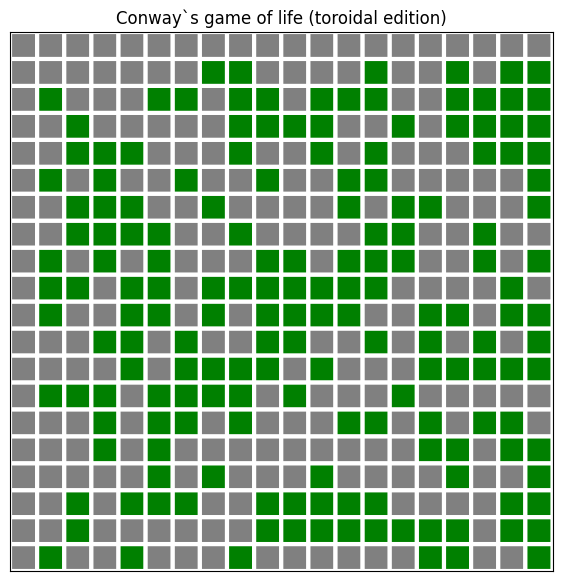

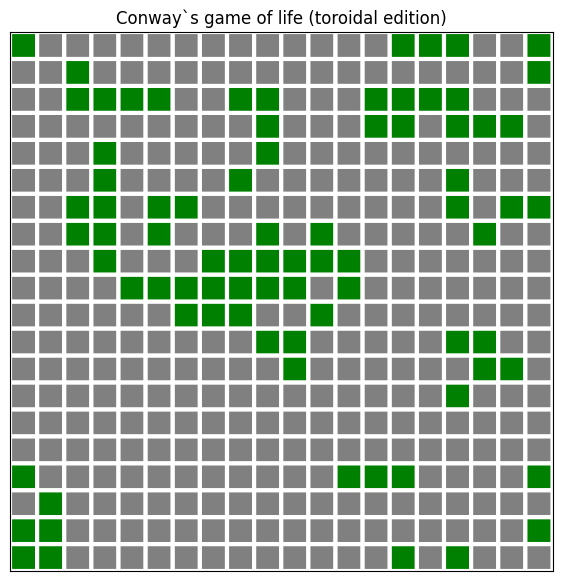

In [15]:
# matrix = generate_data(20,20)
visualization(matrix) 

for _ in range(20):
    matrix = lifeCycle(matrix)  
    
visualization(matrix) 
   
